In [281]:
#imports
import seaborn as sns
import numpy as np
from math import sin

In [282]:
def f_x3(x):
    return ((1/4)*x**3)-(x**2)+((1/4)*x)+(3/2)

def f_x2(x):
    return x**2+x

def sinus(x):
    return sin(x)

def data_generator(func,values = np.arange(-10,10,0.2),n=1):

    x =[]
    y =[]
    for _ in range(n):
        for j in values:
            x.append(j)
            y.append(func(j)+np.random.normal(func(j),0.1))
    return [x,y]

<AxesSubplot:>

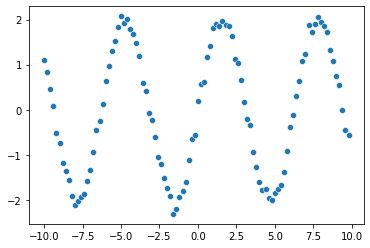

In [283]:
x,y = data_generator(func=sinus)
sns.scatterplot(x=x,y=y)

In [284]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

poly_x_train = [[x**3,x**2,x,1] for x in x_train]
poly_x_test = [[x**3,x**2,x,1] for x in x_test]

In [285]:
poly_x_train

[[0.9999999999998828, 0.9999999999999218, 0.9999999999999609, 1],
 [-216.00000000000153, 36.00000000000017, -6.000000000000014, 1],
 [7.999999999999488, 3.9999999999998295, 1.9999999999999574, 1],
 [124.999999999996, 24.999999999999467, 4.999999999999947, 1],
 [-46.65600000000089, 12.960000000000164, -3.6000000000000227, 1],
 [-195.1120000000015, 33.64000000000017, -5.800000000000015, 1],
 [215.99999999999386, 35.99999999999932, 5.999999999999943, 1],
 [-0.21600000000003608, 0.36000000000004007, -0.6000000000000334, 1],
 [-438.9760000000015, 57.76000000000013, -7.6000000000000085, 1],
 [13.82399999999924, 5.759999999999788, 2.399999999999956, 1],
 [-729.0000000000009, 81.00000000000007, -9.000000000000004, 1],
 [-39.30400000000081, 11.560000000000159, -3.4000000000000234, 1],
 [-85.18400000000115, 19.360000000000174, -4.40000000000002, 1],
 [-373.2480000000015, 51.840000000000146, -7.20000000000001, 1],
 [32.76799999999856, 10.2399999999997, 3.199999999999953, 1],
 [-343.0000000000016,

In [286]:
weights = np.array([0,0,0,0],dtype="float64")
alpha = 0.01
epochs = 2

In [287]:
for epoch in range(5):
    opt = np.array([0,0,0,0],dtype="float64")
    for i,dp in enumerate(poly_x_train):
        opt += np.array(dp)*(np.dot(weights.T,dp)-y_train[i])

    weights -= ((alpha*2)*opt)/len(poly_x_train)
    print("Optimization:", opt)
    print("Weights",weights)

    print(f"Epoch {epoch} finished")



Optimization: [ 2.78437407e+07 -6.50263314e+05  3.85072156e+05 -8.15318358e+03]
Weights [ 2.19159946e+00  6.75968162e-03  2.85168547e-02 -1.87407059e-03]
Epoch 0 finished
Optimization: [ 2.78437407e+07 -6.50263314e+05  3.85072156e+05 -8.15318358e+03]
Weights [-6.30929856e+03  3.61459578e+01 -8.75397617e+01  2.85111234e-01]
Epoch 1 finished
Optimization: [ 2.78437407e+07 -6.50263314e+05  3.85072156e+05 -8.15318358e+03]
Weights [ 1.81710118e+07 -1.06203354e+05  2.52102061e+05 -8.67990734e+02]
Epoch 2 finished
Optimization: [ 2.78437407e+07 -6.50263314e+05  3.85072156e+05 -8.15318358e+03]
Weights [-5.23332101e+10  3.05951497e+08 -7.26063408e+08  2.50118436e+06]
Epoch 3 finished
Optimization: [ 2.78437407e+07 -6.50263314e+05  3.85072156e+05 -8.15318358e+03]
Weights [ 1.50721651e+14 -8.81155217e+11  2.09109044e+12 -7.20355955e+09]
Epoch 4 finished


In [288]:
weights

array([ 1.50721651e+14, -8.81155217e+11,  2.09109044e+12, -7.20355955e+09])